In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [4]:
class_name = 'Occupancy'

dataset_path="/content/drive/Shared drives/DM2/files/temporal_splits/split_df_30min_Temperature.csv"
df = pd.read_csv(dataset_path)

df.head()
#del df['Temperature']
#del df['Humidity']
#del df['Light']
#del df['CO2']
#del df['HumidityRatio']


#df.loc[df["Occupancy"] == 1, "Occupancy"] = 'Yes'
#df.loc[df["Occupancy"] == 0, "Occupancy"] = 'No'


df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,TimeSlot,Weekend,WorkingHour,Occupancy
0,15.904468,15.904468,15.904468,15.904468,15.904468,15.904468,15.608629,15.726965,15.756549,15.726965,15.608629,15.608629,15.608629,15.608629,15.608629,15.682589,15.608629,15.608629,15.608629,15.608629,15.608629,15.608629,15.608629,15.608629,15.657935,15.805855,15.608629,15.608629,15.608629,15.608629,2,0,1,1
1,15.608629,15.534669,15.431125,15.608629,15.386749,15.312789,15.312789,15.312789,15.312789,15.312789,15.312789,15.150077,14.987365,14.987365,14.987365,14.987365,14.987365,14.987365,14.928197,14.987365,14.938059,14.987365,14.790139,14.913405,14.691525,14.740832,14.691525,14.691525,14.691525,14.691525,2,0,1,1
2,14.691525,14.691525,14.691525,14.638274,14.425270,14.514022,14.691525,14.469646,14.425270,14.425270,14.425270,14.425270,14.425270,14.425270,14.425270,14.425270,14.247766,14.277350,14.277350,14.366102,14.178737,14.247766,14.129430,14.129430,14.129430,14.129430,14.011094,13.892758,13.863174,13.833590,2,0,1,1
3,13.833590,13.779353,13.833590,13.833590,13.779353,13.670878,13.833590,13.703421,13.752234,13.670878,13.833590,13.670878,13.833590,13.573251,13.508166,13.508166,13.434206,13.458860,13.458860,13.508166,13.286287,13.360247,13.212327,13.212327,13.212327,13.212327,13.212327,13.159076,13.123575,12.946071,2,0,1,1
4,13.012635,12.946071,12.946071,12.946071,12.946071,12.946071,12.946071,12.946071,12.946071,12.946071,12.946071,12.946071,12.946071,12.946071,12.946071,12.886903,12.768567,12.650231,12.847458,12.650231,12.709399,12.724191,12.650231,12.798151,12.650231,12.650231,12.650231,12.650231,12.650231,12.650231,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.162404,7.295532,7.029276,7.206780,7.162404,7.295532,7.295532,7.295532,1,0,0,0
679,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.162404,7.162404,7.029276,7.162404,7.118028,7.228968,7.029276,7.295532,7.206780,7.295532,7.295532,7.295532,7.295532,7.162404,7.206780,7.295532,7.295532,7.162404,7.162404,7.162404,7.295532,7.029276,7.295532,7.295532,1,0,0,0
680,7.206780,7.295532,7.162404,7.029276,7.295532,7.295532,7.162404,7.029276,7.162404,7.206780,7.029276,7.029276,7.029276,7.162404,7.029276,7.029276,7.118028,7.162404,7.162404,7.029276,7.029276,7.029276,7.029276,7.029276,7.162404,7.295532,7.029276,7.029276,7.029276,7.029276,1,0,1,0
681,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.029276,7.162404,7.029276,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,7.295532,1,0,1,0


In [5]:
X = df.iloc[:, 0:30].values
print(X)

#y = df.iloc[:, 61].values
y = df['WorkingHour'].values
print(y)

[[15.90446841 15.90446841 15.90446841 ... 15.60862866 15.60862866
  15.60862866]
 [15.60862866 15.53466872 15.43112481 ... 14.69152542 14.69152542
  14.69152542]
 [14.69152542 14.69152542 14.69152542 ... 13.89275809 13.86317411
  13.83359014]
 ...
 [ 7.20677966  7.29553159  7.1624037  ...  7.02927581  7.02927581
   7.02927581]
 [ 7.02927581  7.02927581  7.02927581 ...  7.29553159  7.29553159
   7.29553159]
 [ 7.29553159  7.39414484  7.44345146 ...  7.39414484  7.36949153
   7.49275809]]
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

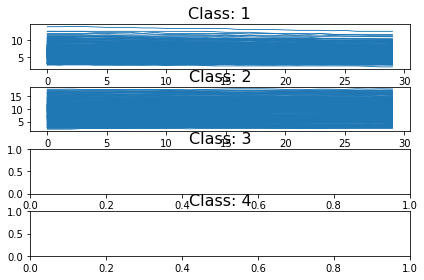

In [6]:
plt.figure()
for i, classe in enumerate([1,2,3,4]):
    plt.subplot(4, 1, i +1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

# Data Normalization

In [7]:
!pip install tslearn
!pip install tensorflow==1.15.0.
from keras.optimizers import Adagrad
from keras.optimizers import Adam
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

     |████████████████████████████████| 747kB 2.7MB/s 
     |████████████████████████████████| 412.3MB 36kB/s 
     |████████████████████████████████| 512kB 23.5MB/s 
     |████████████████████████████████| 3.8MB 34.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=3b4e3340aff4161e9d11e1112e5c0976e943c628b7fff91eb1b2945e1429499a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfu

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#scaler = TimeSeriesScalerMinMax()
#X = scaler.fit_transform(X).reshape(X.shape[0], X.shape[1])

# Data Partitioning

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [11]:
print(X_train)

[[16.46656394 16.62927581 16.54791988 ... 16.46656394 16.46656394
  16.46656394]
 [ 6.4375963   6.4375963   6.4375963  ...  6.4375963   6.4375963
   6.4375963 ]
 [10.54976888 10.54976888 10.54976888 ... 10.63112481 10.63112481
  10.71248074]
 ...
 [ 5.25423729  5.10631741  4.95839753 ...  4.95839753  4.95839753
   4.95839753]
 [ 5.61664099  5.55007704  5.55007704 ...  5.55007704  5.55007704
   5.55007704]
 [ 7.59137134  7.5174114   7.59137134 ...  7.59137134  7.59137134
   7.59137134]]


# Shaplet Classifier

In [12]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 478
ts_sz 30
n_classes 2
shapelet_sizes {3: 4}


In [13]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
from keras import optimizers
b = optimizers.adam(learning_rate=0.001)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer=b,
                        weight_regularizer=.01,
                        max_iter=1000,
                        verbose=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
shp_clf.fit(X_train, y_train)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1000
478/478 [==============================] - 0s 313us/step - loss: 10.2673 - binary_accuracy: 0.6799 - binary_crossentropy: 10.2494
Epoch 2/1000
478/478 [==============================] - 0s 28us/step - loss: 10.2138 - binary_accuracy: 0.6799 - binary_crossentropy: 10.1958
Epoch 3/1000
478/478 [==============================] - 0s 25us/step - loss: 10.1553 - binary_accuracy: 0.6799 - binary_crossentropy: 10.1374
Epoch 4/1000
478/478 [==============================] - 0s 24us/step - loss: 10.1006 - binary_accuracy: 0.6799 - binary_crossentropy: 10.0827
Epoch 5/1000
478/478 [==============================] - 0s 23us/step - loss: 10.0403 - binary_accuracy: 0.6799 - binary_crossentropy: 10.0224
Epoch 6/1000
478/478 [==============================] - 0s 22us/step - loss: 9.9842 - binary_accuracy: 0.6841 - binary_crossentropy: 9.9664
Epoch 7/1000
478/478 [==============================] 

ShapeletModel(batch_size=256, max_iter=1000, n_shapelets_per_size={3: 4},
              optimizer=<keras.optimizers.Adam object at 0x7fb356985128>,
              random_state=None, shapelet_length=0.15, total_lengths=3,
              verbose=1, verbose_level=None, weight_regularizer=0.01)

In [15]:
y_pred = shp_clf.predict(X_test)

205/205 [==============================] - 0s 181us/step


In [16]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8195121951219512
F1-score [0.86346863 0.73381295]
              precision    recall  f1-score   support

           0       0.79      0.96      0.86       122
           1       0.91      0.61      0.73        83

    accuracy                           0.82       205
   macro avg       0.85      0.79      0.80       205
weighted avg       0.84      0.82      0.81       205



# Shaplet-distances-based Classifier

In [17]:
X_train2 = shp_clf.transform(X_train)

478/478 [==============================] - 0s 80us/step


In [18]:
X_train2.shape

(478, 4)

In [19]:
X_train2

array([[ 87.73804   , 143.66556   ,   4.99292   ,  43.498802  ],
       [  0.377594  ,   3.830246  ,  59.99223   ,  11.457835  ],
       [ 11.903656  ,  36.83595   ,  11.700114  ,   0.4605306 ],
       ...,
       [  3.40713   ,   0.22843933,  80.60181   ,  21.316498  ],
       [  1.8922985 ,   1.144038  ,  72.341385  ,  17.183514  ],
       [  0.22047934,   9.525442  ,  43.02523   ,   4.8334045 ]],
      dtype=float32)

In [20]:
X_test2 = shp_clf.transform(X_test)

205/205 [==============================] - 0s 21us/step


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clf = KNeighborsClassifier(n_neighbors=26, weights='uniform')
clf.fit(X_train2, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

In [23]:
y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8341463414634146
F1-score [0.87121212 0.76712329]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       122
           1       0.89      0.67      0.77        83

    accuracy                           0.83       205
   macro avg       0.85      0.81      0.82       205
weighted avg       0.84      0.83      0.83       205



In [0]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8
F1-score [0.84528302 0.71724138]
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       122
           1       0.84      0.63      0.72        83

    accuracy                           0.80       205
   macro avg       0.81      0.77      0.78       205
weighted avg       0.81      0.80      0.79       205



# Feature-based Classifier

In [0]:
import scipy.stats as stats

In [0]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [28]:
!pip install tsfresh
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

     |████████████████████████████████| 92kB 2.7MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=ca6b3378b72dc98972867dcab7bdd2c4d9376b146dc8f583d8ca89648fd45358
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built locket


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
X_train3 = np.array([list(calculate_features(x).values()) for x in X_train])

temp = pd.DataFrame(X_train3)
print (temp) 

impute(temp)
features_filtered = select_features(temp, y_train)

print (features_filtered)
features_filtered.to_numpy()

X_train3 = features_filtered.to_numpy()
X_train3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


            0         1         2   ...          10        11         12
0    16.556959  0.103462  0.010704  ...  160.028826  0.845292  -0.455148
1     6.452388  0.044376  0.001969  ...  145.402778  2.666667   5.111111
2    10.641972  0.088735  0.007874  ...  119.929773  0.704700  -0.213170
3    10.544838  0.018449  0.000340  ...  571.571573 -3.474396  10.071429
4     3.517001  0.156159  0.024386  ...   22.521881 -0.012948   0.047102
..         ...       ...       ...  ...         ...       ...        ...
473   6.963534  0.120328  0.014479  ...   57.871302 -1.316968  -0.209846
474   3.970293  0.102676  0.010542  ...   38.668078 -0.711968  -0.770596
475   5.076733  0.116403  0.013550  ...   43.613563  0.429262  -1.296296
476   5.578921  0.080031  0.006405  ...   69.709794  2.573484   4.760540
477   7.602465  0.034094  0.001162  ...  222.986433  0.913660   1.306298

[478 rows x 13 columns]
            8          7          0   ...        2         9          12
0    16.710632  16.629276 

array([[ 1.67106317e+01,  1.66292758e+01,  1.65569594e+01, ...,
         1.07044591e-02,  1.62711864e-01, -4.55148301e-01],
       [ 6.45238829e+00,  6.43759630e+00,  6.45238829e+00, ...,
         1.96922609e-03,  0.00000000e+00,  5.11111111e+00],
       [ 1.07694299e+01,  1.07124807e+01,  1.06419723e+01, ...,
         7.87390597e-03,  1.62711864e-01, -2.13170102e-01],
       ...,
       [ 5.25423729e+00,  5.15562404e+00,  5.07673344e+00, ...,
         1.35495721e-02,  1.97226502e-01, -1.29629587e+00],
       [ 5.63661017e+00,  5.55007704e+00,  5.57892142e+00, ...,
         6.40490787e-03,  0.00000000e+00,  4.76053955e+00],
       [ 7.67272727e+00,  7.59137134e+00,  7.60246533e+00, ...,
         1.16239040e-03,  0.00000000e+00,  1.30629758e+00]])

In [30]:
X_train3.shape

(478, 11)

In [31]:
X_train3

array([[ 1.67106317e+01,  1.66292758e+01,  1.65569594e+01, ...,
         1.07044591e-02,  1.62711864e-01, -4.55148301e-01],
       [ 6.45238829e+00,  6.43759630e+00,  6.45238829e+00, ...,
         1.96922609e-03,  0.00000000e+00,  5.11111111e+00],
       [ 1.07694299e+01,  1.07124807e+01,  1.06419723e+01, ...,
         7.87390597e-03,  1.62711864e-01, -2.13170102e-01],
       ...,
       [ 5.25423729e+00,  5.15562404e+00,  5.07673344e+00, ...,
         1.35495721e-02,  1.97226502e-01, -1.29629587e+00],
       [ 5.63661017e+00,  5.55007704e+00,  5.57892142e+00, ...,
         6.40490787e-03,  0.00000000e+00,  4.76053955e+00],
       [ 7.67272727e+00,  7.59137134e+00,  7.60246533e+00, ...,
         1.16239040e-03,  0.00000000e+00,  1.30629758e+00]])

In [32]:
X_test3 = np.array([list(calculate_features(x).values()) for x in X_test])

temp = pd.DataFrame(X_test3)
print (temp) 

impute(temp)
features_filtered = select_features(temp, y_test)

print (features_filtered)
features_filtered.to_numpy()

X_test3 = features_filtered.to_numpy()
X_test3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


            0         1         2   ...          10        11        12
0    10.356158  0.604182  0.365036  ...   17.140798 -0.372439 -1.264200
1     7.916795  0.000000  0.000000  ...         inf  0.000000 -3.000000
2     4.915172  0.138250  0.019113  ...   35.552714 -0.510031  0.888194
3     7.316898  0.208862  0.043623  ...   35.032204 -0.001616 -1.317265
4     4.347817  0.033492  0.001122  ...  129.817256  3.092179  8.415092
..         ...       ...       ...  ...         ...       ...       ...
200   8.306498  0.316333  0.100066  ...   26.258743 -1.057807 -0.182115
201   7.876117  0.076942  0.005920  ...  102.363766 -1.493003  0.449905
202   6.350981  0.195633  0.038272  ...   32.463795  0.089884 -1.055527
203   6.707961  0.052677  0.002775  ...  127.341050 -1.699256  1.083899
204   9.071721  0.051010  0.002602  ...  177.841812 -0.450592  2.120457

[205 rows x 13 columns]
            8          7          3   ...        2         9         12
0    11.072419  10.875193  10.549769  .

array([[ 1.10724191e+01,  1.08751926e+01,  1.05497689e+01, ...,
         3.65035657e-01,  1.10939908e+00, -1.26420023e+00],
       [ 7.91679507e+00,  7.91679507e+00,  7.91679507e+00, ...,
         0.00000000e+00,  0.00000000e+00, -3.00000000e+00],
       [ 4.95839753e+00,  4.95839753e+00,  4.95839753e+00, ...,
         1.91131356e-02,  0.00000000e+00,  8.88194247e-01],
       ...,
       [ 6.58551618e+00,  6.43759630e+00,  6.43759630e+00, ...,
         3.82721658e-02,  3.25423729e-01, -1.05552692e+00],
       [ 6.73343606e+00,  6.73343606e+00,  6.73343606e+00, ...,
         2.77487998e-03,  0.00000000e+00,  1.08389854e+00],
       [ 9.15192604e+00,  9.07057011e+00,  9.07057011e+00, ...,
         2.60202569e-03,  0.00000000e+00,  2.12045663e+00]])

In [33]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train3, y_train)

y_pred = clf.predict(X_test3)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7707317073170732
F1-score [0.80658436 0.71856287]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       122
           1       0.71      0.72      0.72        83

    accuracy                           0.77       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.77      0.77      0.77       205



# Time Series Classifier

In [34]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8146341463414634
F1-score [0.85496183 0.74324324]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       122
           1       0.85      0.66      0.74        83

    accuracy                           0.81       205
   macro avg       0.82      0.79      0.80       205
weighted avg       0.82      0.81      0.81       205



In [35]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8048780487804879
F1-score [0.8540146  0.70588235]
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       122
           1       0.91      0.58      0.71        83

    accuracy                           0.80       205
   macro avg       0.84      0.77      0.78       205
weighted avg       0.82      0.80      0.79       205



In [36]:
!pip install pyts
from pyts.classification import KNeighborsClassifier

     |████████████████████████████████| 2.5MB 2.8MB/s 


In [37]:
clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7317073170731707
F1-score [0.76595745 0.68571429]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       122
           1       0.65      0.72      0.69        83

    accuracy                           0.73       205
   macro avg       0.72      0.73      0.73       205
weighted avg       0.74      0.73      0.73       205



# CNN Classifier

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

In [0]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [40]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  30
N. LABELS:  2


In [0]:
cnn = build_simple_cnn(n_timesteps, n_outputs)

In [42]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 23, 16)            144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 16)            64        
_________________________________________________________________
activation_1 (Activation)    (None, 23, 16)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 19, 32)            2592      
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 32)            128       
_________________________________________________________________
activation_2 (Activation)    (None, 19, 32)           

In [0]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [0]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [45]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Train on 382 samples, validate on 96 samples
Epoch 1/5
382/382 [==============================] - 1s 2ms/step - loss: 0.6611 - accuracy: 0.6885 - val_loss: 0.9668 - val_accuracy: 0.4062
Epoch 2/5
382/382 [==============================] - 0s 416us/step - loss: 0.6088 - accuracy: 0.7775 - val_loss: 0.6732 - val_accuracy: 0.4375
Epoch 3/5
382/382 [==============================] - 0s 429us/step - loss: 0.5233 - accuracy: 0.7853 - val_loss: 0.6516 - val_accuracy: 0.6875
Epoch 4/5
382/382 [==============================] - 0s 406us/step - loss: 0.5296 - accuracy: 0.7775 - val_loss: 0.6403 - val_accuracy: 0.6875
Epoch 5/5
382/382 [==============================] - 0s 415us/step - loss: 0.4734 - accuracy: 0.8403 - val_loss: 0.6095 - val_accuracy: 0.6875


In [46]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7609756097560976
F1-score [0.79497908 0.71345029]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       122
           1       0.69      0.73      0.71        83

    accuracy                           0.76       205
   macro avg       0.75      0.76      0.75       205
weighted avg       0.76      0.76      0.76       205



In [47]:
print (cnn.metrics_names)
cnn.evaluate(X_test_cnn, y_test)

['loss', 'accuracy']
205/205 [==============================] - 0s 117us/step


[0.567057697656678, 0.7609755992889404]

# LSTM Classifier

In [0]:
from keras.layers import LSTM

In [0]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(8, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [0]:
lstm = build_lstm(n_timesteps, n_outputs)

In [51]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
_________________________________________________________________
dropout_5 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
Total params: 344
Trainable params: 344
Non-trainable params: 0
_________________________________________________________________


In [52]:
history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=mini_batch_size*4, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Train on 382 samples, validate on 96 samples
Epoch 1/30
382/382 [==============================] - 0s 261us/step - loss: 0.4700 - accuracy: 0.8168 - val_loss: 0.6099 - val_accuracy: 0.7708
Epoch 2/30
382/382 [==============================] - 0s 255us/step - loss: 0.4444 - accuracy: 0.8403 - val_loss: 0.6147 - val_accuracy: 0.7812
Epoch 3/30
382/382 [==============================] - 0s 260us/step - loss: 0.4367 - accuracy: 0.8403 - val_loss: 0.6233 - val_accuracy: 0.7812
Epoch 4/30
382/382 [==============================] - 0s 267us/step - loss: 0.4365 - accuracy: 0.8325 - val_loss: 0.6281 - val_accuracy: 0.7812
Epoch 5/30
382/382 [==============================] - 0s 257us/step - loss: 0.4388 - accuracy: 0.8272 - val_loss: 0.6279 - val_accuracy: 0.7812
Epoch 6/30
382/382 [==============================] - 0s 258us/step - loss: 0.4400 - accuracy: 0.8482 - val_loss: 0.6350 - val_accuracy: 0.7917
Epoch 7/30
382/382 [==============================] - 0s 243us/step - loss: 0.4423 - accura

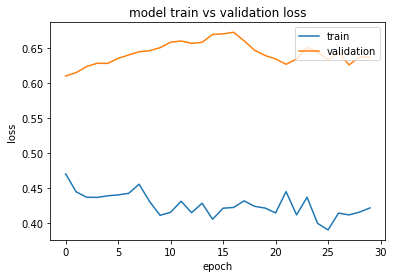

In [53]:
from matplotlib import pyplot
pyplot.plot(history_lstm['loss'])
pyplot.plot(history_lstm['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [54]:
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5951219512195122
F1-score [0.74617737 0.        ]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       122
           1       0.00      0.00      0.00        83

    accuracy                           0.60       205
   macro avg       0.30      0.50      0.37       205
weighted avg       0.35      0.60      0.44       205



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
